In [1]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv('../../data/merged_cleaned_data/cases_merged_data_svi_pct_cols.csv')
df.head()

,Unnamed: 0,FIPS,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,...,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,first_year_cases
0,0,1001,15.4,4.2,29372.0,11.3,14.6,24.2,19.3,7.5,...,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,6589
1,1,1009,14.4,4.1,22656.0,19.8,17.8,23.4,14.2,7.0,...,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,6444
2,2,1013,23.5,6.7,20430.0,15.4,19.0,22.8,17.7,10.5,...,19011.0,78.563680,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,2097
3,3,1015,18.6,8.8,24706.0,15.9,16.8,21.9,20.8,10.4,...,22231.0,79.439032,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,14224
4,4,1017,16.6,5.0,22827.0,18.6,18.9,20.7,16.7,9.7,...,21532.0,76.995358,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,3488


In [3]:
#set index to FIPS
df = df.set_index(df['FIPS'])
df= df.drop(['FIPS','Unnamed: 0'], axis=1)

In [4]:
zeros = df.loc[df['first_year_cases']==0]
df = df.drop(index = zeros.index)
df

,EP_POV,EP_UNEMP,EP_PCI,EP_NOHSDP,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_MINRTY,EP_LIMENG,...,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,first_year_cases
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,15.4,4.2,29372.0,11.3,14.6,24.2,19.3,7.5,25.0,0.8,...,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,6589
1009,14.4,4.1,22656.0,19.8,17.8,23.4,14.2,7.0,12.9,1.7,...,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,6444
1013,23.5,6.7,20430.0,15.4,19.0,22.8,17.7,10.5,48.1,0.5,...,19011.0,78.563680,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,2097
1015,18.6,8.8,24706.0,15.9,16.8,21.9,20.8,10.4,27.5,1.0,...,22231.0,79.439032,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,14224
1017,16.6,5.0,22827.0,18.6,18.9,20.7,16.7,9.7,44.2,0.1,...,21532.0,76.995358,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,3488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48131,25.6,10.6,17864.0,32.9,17.8,26.1,26.2,15.8,90.9,5.7,...,19853.0,79.125428,78.895880,76.629575,60.576045,73.670302,64.571017,68.007770,50.959826,1214
48505,39.5,11.0,17228.0,40.0,13.9,33.6,17.3,17.1,95.7,24.4,...,16007.0,79.355639,79.572483,74.378252,77.443239,76.386871,74.001471,73.609838,47.134744,1760
48507,34.8,8.4,13350.0,38.0,13.7,29.5,23.3,16.1,95.0,8.0,...,13393.0,78.392216,76.024682,75.848196,76.967659,77.303576,70.010162,71.121990,65.403060,1844


In [5]:
#create variable for case% for each counties population
df['case_pct'] = df['first_year_cases']/df['E_TOTPOP']*100
df['case_pct'].head()

FIPS
1001    11.936594
1009    11.178767
1013    10.471910
1015    12.358164
1017    10.311595
Name: case_pct, dtype: float64

In [6]:
df['case_pct'].describe()

count    3034.000000
mean        9.501167
std         2.939667
min         0.271796
25%         7.766193
50%         9.486029
75%        11.180321
max        38.010657
Name: case_pct, dtype: float64

## RF Regressor

In [7]:
df.shape

(3034, 65)

In [8]:
# Define feature set (x)
X = df.drop(['first_year_cases','case_pct'], axis=1)

#Define (y)
y= df['case_pct']

In [9]:
X.columns.to_list()

['EP_POV',
 'EP_UNEMP',
 'EP_PCI',
 'EP_NOHSDP',
 'EP_AGE65',
 'EP_AGE17',
 'EP_DISABL',
 'EP_SNGPNT',
 'EP_MINRTY',
 'EP_LIMENG',
 'EP_MUNIT',
 'EP_MOBILE',
 'EP_CROWD',
 'EP_NOVEH',
 'EP_GROUPQ',
 'EPL_POV',
 'EPL_UNEMP',
 'EPL_PCI',
 'EPL_NOHSDP',
 'SPL_THEME1',
 'RPL_THEME1',
 'EPL_AGE65',
 'EPL_AGE17',
 'EPL_DISABL',
 'EPL_SNGPNT',
 'SPL_THEME2',
 'RPL_THEME2',
 'EPL_MINRTY',
 'EPL_LIMENG',
 'SPL_THEME3',
 'RPL_THEME3',
 'EPL_MUNIT',
 'EPL_MOBILE',
 'EPL_CROWD',
 'EPL_NOVEH',
 'EPL_GROUPQ',
 'SPL_THEME4',
 'RPL_THEME4',
 'SPL_THEMES',
 'RPL_THEMES',
 'EP_UNINSUR',
 'E_TOTPOP',
 'AREA_SQMI',
 'Agreeableness',
 'Belief In Science',
 'Collectivism',
 'Conflict Awareness',
 'Conscientiousness',
 'Empathy',
 'Employment Rate',
 'Entrepreneurship',
 'Extraversion',
 'Gender Equality',
 'Hopefulness',
 'Income Per Capita',
 'Neuroticism',
 'Openness',
 'Religiosity',
 'Risk Taking',
 'Selflessness',
 'Tolerance',
 'Work Ethic',
 'dem_pct']

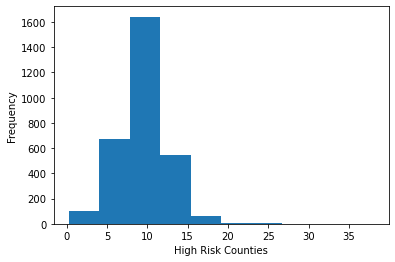

In [10]:
# frequency histogram to see how many counties are high risk and low risk
plt.hist(df["case_pct"])
plt.xlabel("High Risk Counties")
plt.ylabel("Frequency")
plt.show()

In [11]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 42) 

In [12]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2123, 63)
(911, 63)
(2123,)
(911,)


In [13]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:

# evaluate random search 
from sklearn.ensemble import RandomForestRegressor

def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test_scaled)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / len(y_test))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 200, random_state = 42)
base_model = base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test_scaled, y_test)

Model Performance
Average Error: 1.7135 degrees.
Accuracy = 99.81%.


In [15]:
preds = pd.DataFrame(base_model.predict(X_test_scaled))
preds

,0
0,11.073028
1,9.527965
2,11.029373
3,9.771099
4,9.748028
...,...
906,8.978888
907,9.244578
908,7.656429
909,9.943878


In [16]:
actual = y_test.values
actual_df = pd.DataFrame(actual)
actual_df

,0
0,8.720192
1,9.072933
2,12.827744
3,11.606623
4,8.174533
...,...
906,8.075350
907,8.476933
908,6.963202
909,11.915667


In [17]:
results = actual_df.merge(preds, how = 'inner', left_index=True, right_index=True)
results = results.rename(columns = {'0_x':'Actual', '0_y':'Pred'})
results

,Actual,Pred
0,8.720192,11.073028
1,9.072933,9.527965
2,12.827744,11.029373
3,11.606623,9.771099
4,8.174533,9.748028
...,...,...
906,8.075350,8.978888
907,8.476933,9.244578
908,6.963202,7.656429
909,11.915667,9.943878


In [18]:
results['error'] = results['Actual']-results['Pred']
results['abs_error'] = abs(results['error'])
results

,Actual,Pred,error,abs_error
0,8.720192,11.073028,-2.352836,2.352836
1,9.072933,9.527965,-0.455032,0.455032
2,12.827744,11.029373,1.798372,1.798372
3,11.606623,9.771099,1.835524,1.835524
4,8.174533,9.748028,-1.573496,1.573496
...,...,...,...,...
906,8.075350,8.978888,-0.903538,0.903538
907,8.476933,9.244578,-0.767645,0.767645
908,6.963202,7.656429,-0.693228,0.693228
909,11.915667,9.943878,1.971789,1.971789


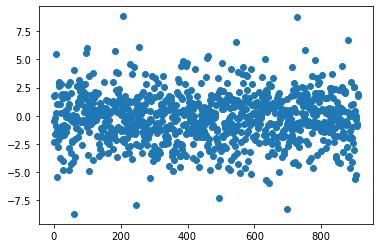

In [19]:
plt.scatter(results.index,results['error'])

In [23]:
results[results['abs_error']==results['abs_error'].max()]

,Actual,Pred,error,abs_error
206,18.48615,9.648704,8.837447,8.837447


In [21]:
results['error'].describe()

count    911.000000
mean      -0.228220
std        2.209698
min       -8.704527
25%       -1.562633
50%       -0.197838
75%        1.145298
max        8.837447
Name: error, dtype: float64

In [31]:
high_err = results[results['abs_error']>1]
high_err['Actual'].count()/results['Actual'].count()

0.6245883644346871

In [33]:
results['abs_error'].describe()

count    911.000000
mean       1.713504
std        1.412652
min        0.007170
25%        0.671574
50%        1.356136
75%        2.385171
max        8.837447
Name: abs_error, dtype: float64